# Projeto - Machine Learning I
#### `Professor`: Alex Lima

Este documento descreve os requisitos e critérios de avaliação para projeto de Machine Learning I.

A principal finalidade deste projeto é fazer com o aluno pratique a exploração e modelagem de dados apresentados ao longo do modelo de machine learning I. Assim, durante o planejamento e desenvolvimento de seu projeto, recomenda-se visitar a ementa do módulo e mapear em seu projeto os itens previstos e lecionados em aula.

**DESAFIO**: Seu desafio neste módulo é conhecer uma área de negócio ou ciência de seu interesse e propor uma solução por meio de um modelo de machine learning. A solução deve ser apresentada prlo grupo no último dia de aula e detalhada em um report (jupyter notebook). Como referência, a equipe pode seguir os passos descritos a seguir:
 - `Introdução`
     > Descreva a área e a solução proposta em seu projeto
 - `Coleta de dados`
     > Busque ou construa um dataset relacionado ao problema que deseja solucionar.
 - `Desenvolvimento`
     > Desenvolva um modelo de machine learning, utilizando o algoritmo de sua escolha. Inclua métricas e visualizações que tornem seu modelo atrativo e compreensível para que não é da área de dados.
 - `Apresentação`
     > A apresentação deve ocorrer no último dia de aula (29/04). A equipe terá até 20 minutos para apresentar sua solução.
  
### Bons estudos! Sucesso!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from typing import Dict

### Criando Dataset

In [3]:
size = 100
# Dados de entrada sobre as frutas para a geração dos dados aleatórios.
inputs = [{'Class':     'Banana', 'Mean_height': 18, 'Std_height':   3, 'Mean_width':  5, 'Std_width':   1},
          {'Class':      'Apple', 'Mean_height': 10, 'Std_height': 1.5, 'Mean_width': 12, 'Std_width': 1.5},
          {'Class':      'Lemon', 'Mean_height':  5, 'Std_height':   1, 'Mean_width':  5, 'Std_width':   1},
          {'Class': 'Watermelon', 'Mean_height': 20, 'Std_height': 2.5, 'Mean_width': 25, 'Std_width':   3},
          {'Class':     'Papaya', 'Mean_height': 28, 'Std_height':   3, 'Mean_width': 15, 'Std_width':   2},
          {'Class':      'Mango', 'Mean_height': 17, 'Std_height': 1.5, 'Mean_width': 12, 'Std_width': 1.5},
          {'Class': 'Strawberry', 'Mean_height':  4, 'Std_height': 0.5, 'Mean_width':  2, 'Std_width': 0.5},
          {'Class':      'Grape', 'Mean_height':  2, 'Std_height': 0.5, 'Mean_width':  2, 'Std_width': 0.5}]

heights = np.array([])
widths = np.array([])
classes = []
# Para cada entrada, acessa a média e o desvio padrão da altura e largura de cada
# fruta e gera uma amostra com base da distribuição normal desses dados.
for input_i in inputs:
  loc_h   = input_i['Mean_height']
  scale_h = input_i['Std_height']
  height = np.random.normal(loc=loc_h, scale=scale_h, size=size)
  heights = np.concatenate([heights, height])

  loc_w   = input_i['Mean_width']
  scale_w = input_i['Std_width']
  width  = np.random.normal(loc=loc_w, scale=scale_w, size=size)
  widths = np.concatenate([widths, width])

  classes += [input_i['Class']] * size


# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Class': classes
})

df

,Width,Height,Class
0,4.928218,18.258725,Banana
1,5.910409,16.695427,Banana
2,4.619175,17.799169,Banana
3,6.711529,19.111904,Banana
4,3.952680,19.378579,Banana
...,...,...,...
795,2.788170,2.160923,Grape
796,1.307774,1.557138,Grape
797,2.346802,2.270465,Grape
798,2.096719,2.455922,Grape


In [4]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
y_pred = model_knn.predict(X_test)

In [11]:
print("Acurácia teste: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))

Acurácia teste: 95.83%


In [12]:
print("Acurácia treino: %.2f%%" % (accuracy_score(y_train, model_knn.predict(X_train) ) * 100.0))

Acurácia treino: 98.93%


In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       0.96      1.00      0.98        27
      Banana       0.97      1.00      0.99        35
       Grape       0.94      0.97      0.95        32
       Lemon       1.00      0.97      0.98        29
       Mango       0.97      0.93      0.95        30
      Papaya       0.88      1.00      0.93        21
  Strawberry       0.94      0.94      0.94        32
  Watermelon       1.00      0.88      0.94        34

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



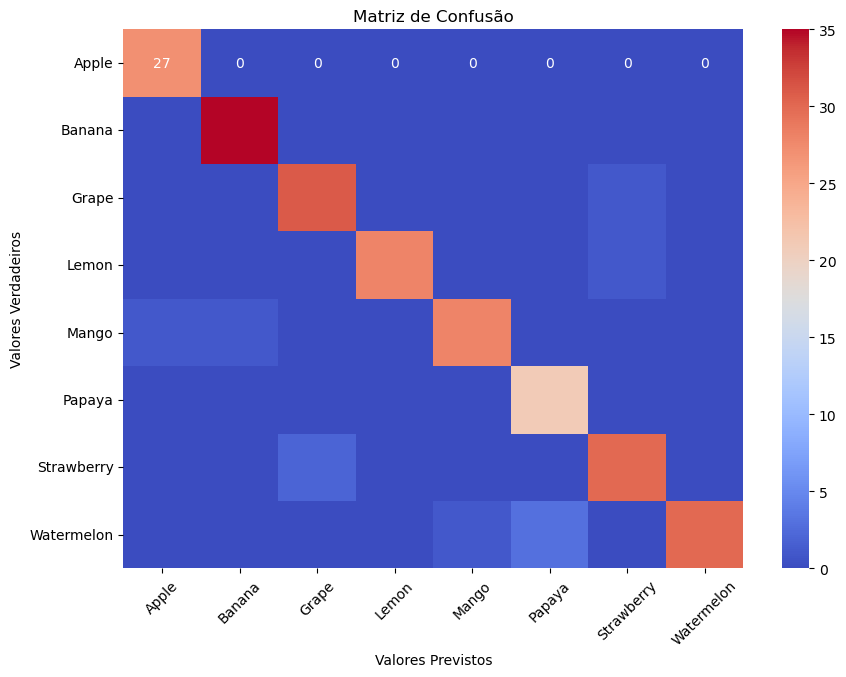

In [28]:
labels = ['Apple', 'Banana', 'Grape', 'Lemon', 'Mango', 'Papaya', 'Strawberry', 'Watermelon'  ]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')

ticks_positions = [(i + 0.5) for i in range(len(labels))]

plt.xticks(ticks=ticks_positions, labels=labels, rotation=45, ha='center')
plt.yticks(ticks=ticks_positions, labels=labels, rotation=0, va='center')

plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

### **Validação Cruzada**

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [23]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [24]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=3)
resultado = cross_val_score(modelo, X, y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 98.11%


### Implemetação algoritmo KNN


In [21]:
class KNN:
  def __init__(self, data: pd.DataFrame):
    self.data = data


  def predict(self, p: Dict, k: int = 0) -> str:
    """
    Define a classe de um ponto com base nos k vizinhos mais próximos.
    Sendo a classe do ponto a classe predominante na vizinhança.
    """
    if k <= 0:
      k = int(sqrt(self.data.shape[0]))

    x = p['Width']
    y = p['Height']

    dists = list()
    # Calcula as distâncias de cada ponto
    for index in range(df.shape[0]):
      xi = self.data.loc[index, 'Width']
      yi = self.data.loc[index, 'Height']
      dist = sqrt((x-xi)**2 + (y-yi)**2)
      # Guarda o índice e a distância para cada ponto
      dists.append((index, dist))
    # Ordena com base nas distâncias
    dists.sort(key=lambda x: x[1])
    # Guarda apenas os índices dos k vizinhos mais próximos
    indexes = [dist[0] for dist in dists[:k]]
    # Guarda as classes das linhas do DataFrame dos índices mais próximos
    neighbors = self.data['Class'].iloc[indexes].tolist()
    # Verifica a classe mais frequente. Em caso de mais de uma classe com frequência
    # máxima, a que tiver um elemento mais próximo será considerada. (A primeira a aparecer)
    max_count = 0
    max_class = ''
    for class_i in set(neighbors):
      count = neighbors.count(class_i)
      if count > max_count:
        max_count = count
        max_class = class_i
    # Retorna a classe mais frequente
    return max_class


  def show(self, colors_dict):

    # Obtém as cores de cada classe
    colors = self.data['Class'].map(colors_dict)

    # Gera o gráfico de dispersão
    plt.scatter(self.data['Width'], self.data['Height'], c=colors, s=30)

    plt.title('Altura e Largura de cada fruta')

    plt.xlabel('Width')
    plt.xlim(0, 40)
    plt.xticks(range(0, 40, 2))

    plt.ylabel('Height')
    plt.ylim(0, 40)
    plt.yticks(range(0, 40, 2))
    # Adiciona a legenda ao gráfico
    legend = []
    for class_i, color in colors_dict.items():
        legend.append(plt.Line2D([0], [0], marker='o', color='w', label=class_i,
                                 markersize=10, markerfacecolor=color))
    plt.legend(handles=legend)

    plt.show()

In [20]:
def acuraciaModelos(lista1, lista2):
    itens_iguais = 0
    for i in range(len(lista1)):
        if lista1[i] == lista2[i]:
            itens_iguais += 1
    return itens_iguais / len(lista1)